In [13]:
import neurolab as nl 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Perceptron

In [8]:
num_dataset = np.array([[0.22,0.34,0],[0.21,0.37,0],[0.76,0.19,1],[0.04,0.14,1],[0.25,0.31,0]])
features = num_dataset[:,:2]
labels =num_dataset[:,2].reshape((num_dataset.shape[0],1))

Text(0.5,1,'Input Data')

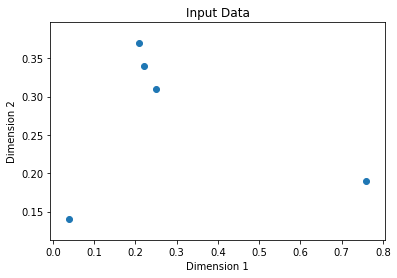

In [10]:
plt.scatter(features[:,0],features[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [15]:
dim1_min,dim1_max,dim2_min,dim2_max = 0,1,0,1
num_output = labels.shape[1]

In [16]:
dim1 = [dim1_min,dim1_max]
dim2 = [dim2_min,dim2_max]


In [17]:
perceptron = nl.net.newp([dim1,dim2],num_output)

The goal of learning is reached


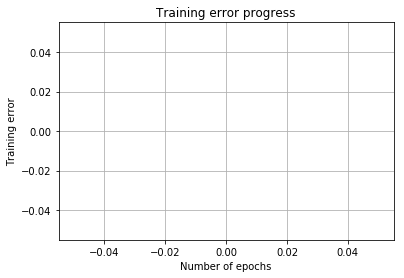

In [19]:
error_progress = perceptron.train(features,labels,epochs = 100, show = 20, lr =0.03)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

In [20]:
perceptron.sim([[0.81,0.23]])

array([[1.]])

In [21]:
perceptron.sim([[0.27,0.42]])

array([[0.]])

# Single Layer Neural Network

In [24]:
text = np.loadtxt('data_simple_nn.txt')
data = text[:,0:2]
labels = text[:,2:]
text

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

Text(0.5,1,'Input Data')

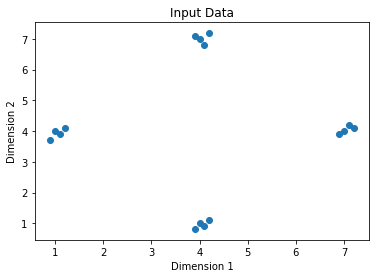

In [26]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [27]:
dim1_min,dim1_max,dim2_min,dim2_max = data[:,0].min(),data[:,0].max(),data[:,1].min(),data[:,0].max()

In [30]:
num_output = labels.shape[1]

dim1 = [dim1_min,dim1_max]
dim2 = [dim2_min,dim2_max]

snn = nl.net.newp([dim1,dim2],num_output)


In [32]:
error_progress = snn.train(data,labels,epochs =100, show =20, lr =0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


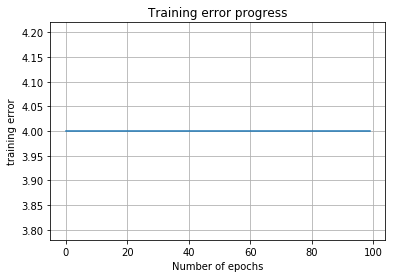

In [33]:
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('training error')
plt.title('Training error progress')
plt.grid()

In [38]:
print('Testing Data: \n')
test_data = [[0.3,4.4],[4.3,0.5],[4.6,8]]
print(test_data)
prediction = [snn.sim([i])[0] for i in test_data]
print('Predictions: \n')
prediction

Testing Data: 

[[0.3, 4.4], [4.3, 0.5], [4.6, 8]]
Predictions: 



[array([0., 0.]), array([1., 0.]), array([1., 1.])]

# Multi Layer Neural Network
- y =3x^2+5

In [39]:
min_vals =-20
max_vals =20
num_points =100
x = np.linspace(min_vals,max_vals,num_points)
y = 3*np.square(x)+5
y/= np.linalg.norm(y)


Text(0.5,1,'Data points')

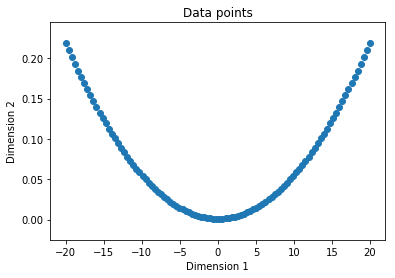

In [41]:
data = x.reshape(num_points,1)
labels = y.reshape(num_points,1)

plt.scatter(data,labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data points')

In [43]:
mlnn = nl.net.newff([[min_vals,max_vals]],[10,6,1])
mlnn.trainf = nl.train.train_gd
rror_progress = mlnn.train(data,labels,epochs =2000,show =100,goal =0.01)

Epoch: 100; Error: 0.07761716193244164;
Epoch: 200; Error: 0.02663111249544336;
Epoch: 300; Error: 0.07450616368117415;
Epoch: 400; Error: 0.03469105970873495;
Epoch: 500; Error: 0.02298592295343738;
Epoch: 600; Error: 0.03422185322725963;
Epoch: 700; Error: 0.03306454430636631;
Epoch: 800; Error: 0.02114686112074053;
Epoch: 900; Error: 0.018221398145088358;
Epoch: 1000; Error: 0.020192514614798034;
Epoch: 1100; Error: 0.02156045205971073;
Epoch: 1200; Error: 0.01918835582297005;
Epoch: 1300; Error: 0.016452302628250686;
Epoch: 1400; Error: 0.015495171077635041;
Epoch: 1500; Error: 0.016069399005232427;
Epoch: 1600; Error: 0.017019191672912694;
Epoch: 1700; Error: 0.01705107002899643;
Epoch: 1800; Error: 0.016146264339980624;
Epoch: 1900; Error: 0.015290166338034145;
Epoch: 2000; Error: 0.01508919218192527;
The maximum number of train epochs is reached


Text(0.5,1,'Actual vs. Predicted')

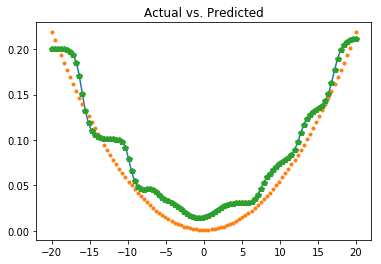

In [44]:
output = mlnn.sim(data)
y_pred = output.reshape(num_points)
x_dense = np.linspace(min_vals,max_vals,num_points*2)
y_dense_predict = mlnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x_dense,y_dense_predict,'-',x,y,'.',x, y_pred,'p')
plt.title('Actual vs. Predicted')